In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
import os
import warnings

warnings.filterwarnings(action='ignore')

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
batch_size = 16
num_classes = 10
epochs = 25

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 674s 4us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
n_kernels = 32
model = Sequential()

model.add(Conv2D(n_kernels, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid', input_shape=(32, 32, 3)))
model.add(Conv2D(n_kernels*2, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(n_kernels*2, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid'))
model.add(Conv2D(n_kernels*4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(n_kernels*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 128)      

In [8]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [10]:
trained_model = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 21s 427us/step - loss: 1.3706 - accuracy: 0.5153 - val_loss: 1.2237 - val_accuracy: 0.5797
Epoch 2/25
50000/50000 [==============================] - 18s 369us/step - loss: 1.0449 - accuracy: 0.6370 - val_loss: 1.0535 - val_accuracy: 0.6327
Epoch 3/25
50000/50000 [==============================] - 19s 378us/step - loss: 0.9076 - accuracy: 0.6889 - val_loss: 0.9448 - val_accuracy: 0.6651
Epoch 4/25
50000/50000 [==============================] - 19s 379us/step - loss: 0.8133 - accuracy: 0.7179 - val_loss: 0.8497 - val_accuracy: 0.7091
Epoch 5/25
50000/50000 [==============================] - 19s 380us/step - loss: 0.7337 - accuracy: 0.7479 - val_loss: 0.8348 - val_accuracy: 0.7191
Epoch 6/25
50000/50000 [==============================] - 19s 388us/step - loss: 0.6708 - accuracy: 0.7732 - val_loss: 0.8082 - val_accuracy: 0.7207
Epoch 7/25
50000/50000 [==============================]

In [12]:
epochs_range = range(25)
validation_accuracy = trained_model.history['val_accuracy']
training_accuracy = trained_model.history['accuracy']

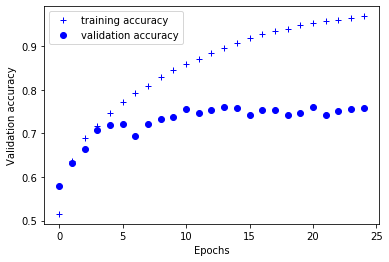

In [13]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()
plt.show()

In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 87us/step
Test loss: 0.9349381753444672
Test accuracy: 0.7595999836921692
